# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> João Gabriel Rodrigues Edivirges </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [11]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

In [3]:
#Abrir o arquivo
df = pd.read_csv('earthquake(1).csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [4]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [5]:
# df=df[df.Latitude>0]
df['Hemisferio']=0
df.loc[(df.Latitude>0),'Hemisferio']='Norte'
df.loc[(df.Latitude<0),'Hemisferio']='Sul'
df.Hemisferio.head()

0    Norte
1    Norte
2      Sul
3      Sul
4    Norte
Name: Hemisferio, dtype: object

In [6]:
df.Magnitude.describe()

count    23412.000000
mean         5.882531
std          0.423066
min          5.500000
25%          5.600000
50%          5.700000
75%          6.000000
max          9.100000
Name: Magnitude, dtype: float64

## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

Como pode-se ver no histograma gerado, mais de 80% dos terremotos ocorreram na faixa de 5.5 e 6.5 graus na escala Richter. Os demais incidentes, distribuem-se em 10% para terremotos entre 6.5 e 7.5 na Richter e os mais graves, 8 até 8.5, são os com menos ocorrência.

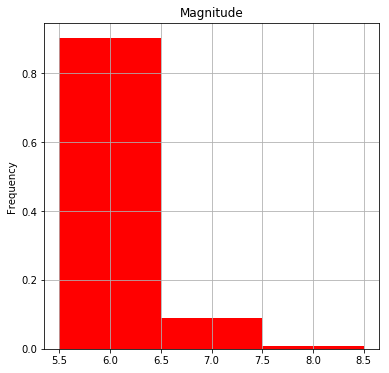

In [12]:
faixa=np.arange(5.5,9.1,1)
plot=df.Magnitude.plot.hist(bins=faixa,title='Magnitude',figsize=(6,6),normed=1,grid=1,color='r')



Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

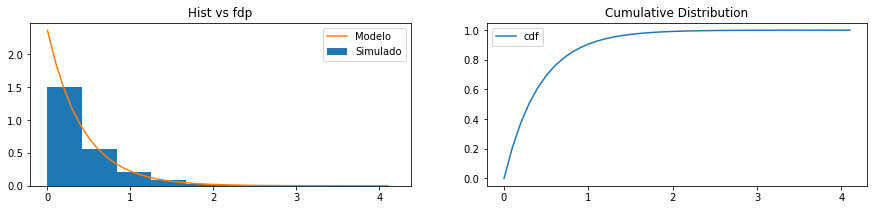

In [13]:

#para fazer uma dist exponencial, leva-se em conta que o loc=0 e o lamb=1/desvpad
desvpad=0.423066
lamb=1/desvpad
#relação loc e scale
loc=0
scale=1/lamb
#dados
X=expon.rvs(loc,scale,len(df.Magnitude))
#plot
fig, ax= plt.subplots(1,2,figsize=(15,3))
#histograma vs fdp
ax[0].hist(X,normed=True)
x=np.arange(X.min(), X.max(), 0.1)
ax[0].plot(x, expon.pdf(x, loc, scale))
ax[0].set_title('Hist vs fdp')
ax[0].legend(['Modelo','Simulado'])
#cdf
ax[1].plot(x,expon.cdf(x, loc, scale))
ax[1].set_title('Cumulative Distribution')
ax[1].legend(['cdf'])



Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [31]:
tab=pd.crosstab(df.Hemisferio, df.Type,margins=True,rownames=['Hemisferio'], colnames=['Acidentes'], normalize=True)*100
tab

Acidentes,Earthquake,Explosion,Nuclear Explosion,Rock Burst,All
Hemisferio,,,,,
0,0.004271,0.000000,0.000000,0.000000,0.004271
Norte,44.712113,0.008543,0.627883,0.000000,45.348539
Sul,54.514779,0.008543,0.119597,0.004271,54.647189
All,99.231164,0.017085,0.747480,0.004271,100.000000


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

prob=45.348539%


Explique o seu raciocínio

Uma vez que a tab está normalizada, verifica-se que a prob total na coluna all é 45,3%. Se não estivesse, a probabilidade seria a soma de todos os eventos dividido pelo total

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

In [35]:
a=0.627883/45.348539
print("A probabilidade de ter sido Nuclear Explosion é :{0}%".format(a))

A probabilidade de ter sido Nuclear Explosion é :0.013845716176214629%


## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

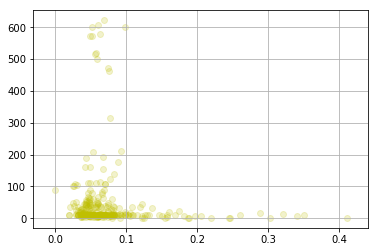

In [14]:
plt.scatter(df['Magnitude Error'],df.Depth,c='y',alpha=0.2)
plt.grid(True)

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [70]:
#correcoef ignora missing data (type nan)
# cor=np.corrcoef(df['Magnitude Error'],df.Depth)
# print (cor)
#do np da ruim
cor=df.Depth.corr(df['Magnitude Error'])
cor

-0.076918438923387192

Explique o que significa o valor da correlação calculada acima? 

In [ ]:
#não sei explicar

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

In [52]:
df.Longitude.describe()

count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64

In [53]:
df.Latitude.describe()

count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64

In [56]:
plot=df.boxplot(column=['Latitude','Longitude'])
plt.ylabel("Graus")

O boxplot indica que no caso da latitude, os valores de graus estão dispersos numa distribuição em relação aos acidentes, aonde o os valores do primeiro estão abaixo da mediana, que se localiza próximo ao zero. No caso da latitude, a mediana está em 0 Graus, o Q1 está entre 0 e aproximadamente -20, o Q3 está entre 0 e aproximadamente 30.Já na longitude, a mediana está em 100, o q1 está entre -50 e perto de 100. Já o Q3 está entre 150 e 100.Isso mostra que as possíveis localizações de um acidente estão nessa faixa de 25% e 75% com as respectivas coordenadas.

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [59]:
#selecionar os MT do tipo MB
mb=df[df['Magnitude Type']=='MB']
mb

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
2576,01/02/1973,00:53:20,-9.8540,117.4270,Earthquake,66.00,NaN,NaN,5.5,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000008,US,US,US,Reviewed
2577,01/03/1973,02:58:17,-27.7160,-63.2610,Earthquake,563.00,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP000000M,US,US,US,Reviewed
2578,01/03/1973,14:31:05,39.1140,71.8890,Earthquake,33.00,NaN,NaN,5.5,MB,...,NaN,NaN,NaN,NaN,NaN,USP000000Q,US,US,US,Reviewed
2579,01/05/1973,13:54:29,-38.9970,175.2320,Earthquake,150.00,NaN,NaN,6.2,MB,...,NaN,NaN,NaN,NaN,NaN,USP000001H,US,US,US,Reviewed
2580,01/06/1973,15:52:42,-14.6650,166.3840,Earthquake,36.00,NaN,NaN,6.1,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000022,US,US,US,Reviewed
2584,01/12/1973,03:16:03,-54.4080,5.3570,Earthquake,33.00,NaN,NaN,5.7,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000042,US,US,US,Reviewed
2585,01/15/1973,09:02:58,27.0810,140.1030,Earthquake,477.00,NaN,NaN,5.8,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000058,US,US,US,Reviewed
2586,01/16/1973,09:47:02,-3.5280,135.4740,Earthquake,7.00,NaN,NaN,5.5,MB,...,NaN,NaN,NaN,NaN,NaN,USP000005S,US,US,US,Reviewed
2587,01/17/1973,09:44:37,-15.1270,-175.0080,Earthquake,251.00,NaN,NaN,5.7,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000067,US,US,US,Reviewed
2590,01/21/1973,20:20:49,-15.8570,-174.0550,Earthquake,129.00,NaN,NaN,5.5,MB,...,NaN,NaN,NaN,NaN,NaN,USP000008B,US,US,US,Reviewed


In [71]:
tipo=mb[mb.Type=='Nuclear Explosion']
tipo['Type']

2797     Nuclear Explosion
2859     Nuclear Explosion
2876     Nuclear Explosion
2897     Nuclear Explosion
2951     Nuclear Explosion
3126     Nuclear Explosion
3205     Nuclear Explosion
3218     Nuclear Explosion
3269     Nuclear Explosion
3286     Nuclear Explosion
3331     Nuclear Explosion
3374     Nuclear Explosion
3445     Nuclear Explosion
3488     Nuclear Explosion
3661     Nuclear Explosion
3663     Nuclear Explosion
3674     Nuclear Explosion
3739     Nuclear Explosion
4004     Nuclear Explosion
4035     Nuclear Explosion
4071     Nuclear Explosion
4109     Nuclear Explosion
4161     Nuclear Explosion
4180     Nuclear Explosion
4275     Nuclear Explosion
4347     Nuclear Explosion
4454     Nuclear Explosion
4465     Nuclear Explosion
4543     Nuclear Explosion
4544     Nuclear Explosion
               ...        
8808     Nuclear Explosion
8877     Nuclear Explosion
8952     Nuclear Explosion
8989     Nuclear Explosion
9002     Nuclear Explosion
9004     Nuclear Explosion
9

In [79]:
#da um count para ver os valores comuns em relação ao hemisferio att (ta dando um erro que não sei resolver.)
#x=(tipo['Hemisferio'].value_counts(normalize=True)*100).round(decimals=3)
tabela=pd.crosstab(df['Hemisferio'],tipo['Type'], margins=True, rownames=['Hemisferio'],colnames=['Tipos Filtrados apenas para MB'], normalize=True)*100
tabela

Tipos Filtrados apenas para MB,Nuclear Explosion,All
Hemisferio,,
Norte,82.822086,82.822086
Sul,17.177914,17.177914
All,100.000000,100.000000


É mais provável ocorre no hemisfério norte.